In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FARWeather = pd.read_csv("Far March Weather.csv")
FARWeather.head()

,Date,High,Avg,Low,High.1,Avg.1,Low.1,High.2,Avg.2,Low.2,High.3,Avg.3,Low.3,High.4,Low.4,Sum,Unnamed: 16,wind avg,wind avg mph,Direction
0,3/1/23,43.7 °F,41.2 °F,37.5 °F,35.4 °F,26.4 °F,20.4 °F,77%,56%,41%,28,16.3,2,29.93 in,29.53 in,0.07 in,NaN,16.3,16.3,WSW
1,3/2/2023,56.9 °F,45.1 °F,34.9 °F,31.7 °F,25.1 °F,20.1 °F,69%,48%,25%,9,3.7,0,30.13 in,29.93 in,0.00 in,NaN,3.7,3.7,S
2,3/3/2023,61.3 °F,48.9 °F,37.5 °F,33.3 °F,29.1 °F,25.8 °F,68%,49%,28%,12,4.9,0,30.00 in,29.84 in,0.00 in,NaN,4.9,4.9,E
3,3/4/2023,57.9 °F,46.5 °F,34.1 °F,38.6 °F,31.8 °F,28.3 °F,81%,58%,35%,31,13.7,0,29.90 in,29.76 in,0.00 in,NaN,13.7,13.7,SW
4,3/5/2023,54.2 °F,47.8 °F,41.3 °F,36.0 °F,32.2 °F,29.0 °F,67%,55%,41%,27,20.4,12,29.96 in,29.88 in,0.00 in,NaN,20.4,20.4,WSW


In [3]:
FARDirection = FARWeather[['Direction']].dropna()
FARDirection.head()

,Direction
0,WSW
1,S
2,E
3,SW
4,WSW


In [4]:
def directionToNumeric(direction):
    direction_mapping = {
    "N": 0,
    "NNE": (0+45)/2,
    "NE": 45,
    "ENE": (45+90)/2,
    "E": 90,
    "ESE": (90+135)/2,
    "SE": 135,
    "SSE": (135+180)/2,
    "S": 180,
    "SSW": (180+225)/2,
    "SW": 225,
    "WSW": (225+270)/2, 
    "W": 270,
    "WNW": (270+315)/2,
    "NW": 315,
    "NNW": (315+360)/2,
    }
    return direction_mapping[direction]

FARDirectionNumeric = FARDirection["Direction"].apply(directionToNumeric)
pd.set_option('display.max_rows', 500)

FARDirectionNumericDataframe =FARDirectionNumeric.to_frame()
FARDirectionNumericDataframeRadians = FARDirectionNumericDataframe['Direction']*np.pi/180
FARDirectionNumericDataframeRadians.to_frame().head() #Displays Data

,Direction
0,4.319690
1,3.141593
2,1.570796
3,3.926991
4,4.319690


In [22]:
FARDirectionNumericDist = FARDirectionNumeric.groupby(FARDirectionNumeric).size()
FARDirectionNumericDist = pd.DataFrame(FARDirectionNumericDist).rename(columns = {"Direction": "Frequency"}).reset_index()
FARDirectionNumericDist.head()

,Direction,Frequency
0,22.5,6
1,45.0,5
2,67.5,7
3,90.0,9
4,112.5,6


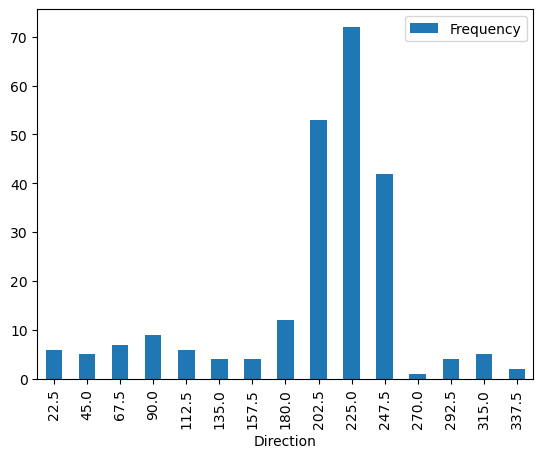

In [23]:
FARDirectionNumericDist.plot.bar(x='Direction', y='Frequency')
plt.show()

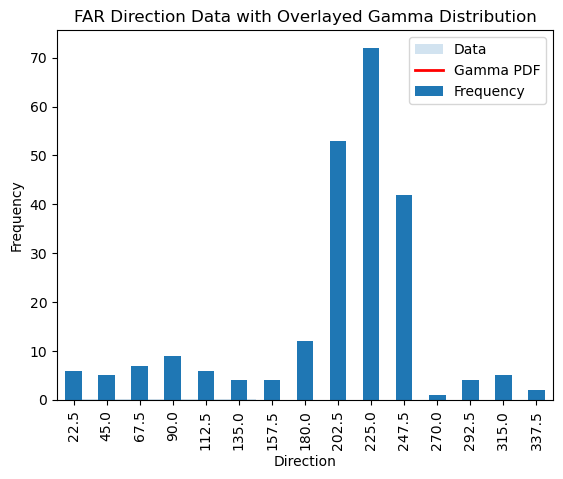

In [24]:
from scipy.stats import gamma

data = np.random.gamma(shape=2.0, scale=2.0, size=1000)
FARDirectionNumericDist.plot.bar(x='Direction', y='Frequency')

plt.hist(data, bins=30, density=True, alpha=0.2, label='Data')

dataLst = FARDirectionNumericDist['Direction'].tolist()

a, loc, scale = gamma.fit(dataLst)

x = np.linspace(min(dataLst), max(dataLst), 1000)

pdf_gamma = gamma.pdf(x, a, loc, scale)

plt.plot(x, pdf_gamma, 'r-', lw=2, label='Gamma PDF')

plt.legend()
plt.title('FAR Direction Data with Overlayed Gamma Distribution')
plt.xlabel('Direction')
plt.ylabel('Frequency')
plt.show()

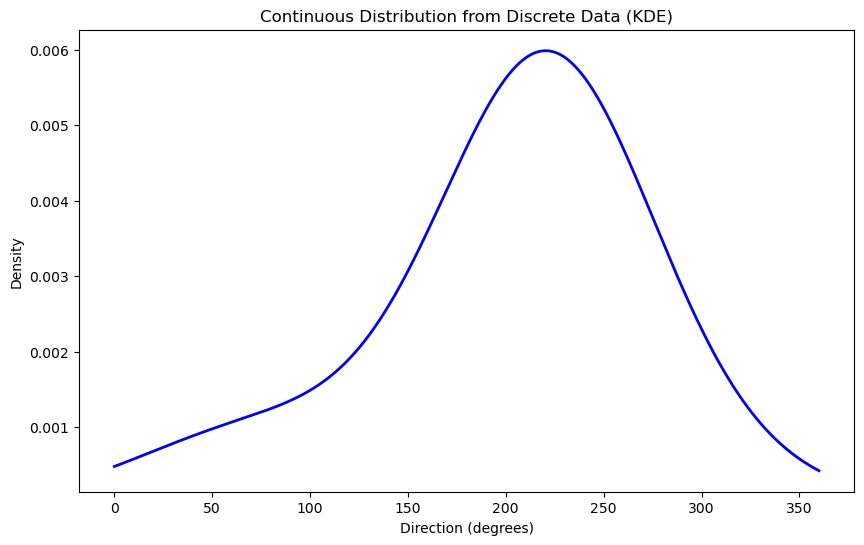

In [25]:
# Displays KDE Plot from discrete direction data
from scipy.stats import gaussian_kde

directions = FARDirectionNumericDist["Direction"].values
frequency = FARDirectionNumericDist["Frequency"].values

kde = gaussian_kde(dataset=directions, weights=frequency)

x_eval = np.linspace(0, 360, num=1000)
pdf = kde.evaluate(x_eval)

plt.figure(figsize=(10, 6))
plt.plot(x_eval, pdf, color='blue', lw=2)
plt.xlabel('Direction (degrees)')
plt.ylabel('Density')
plt.title('Continuous Distribution from Discrete Data (KDE)')
plt.show()

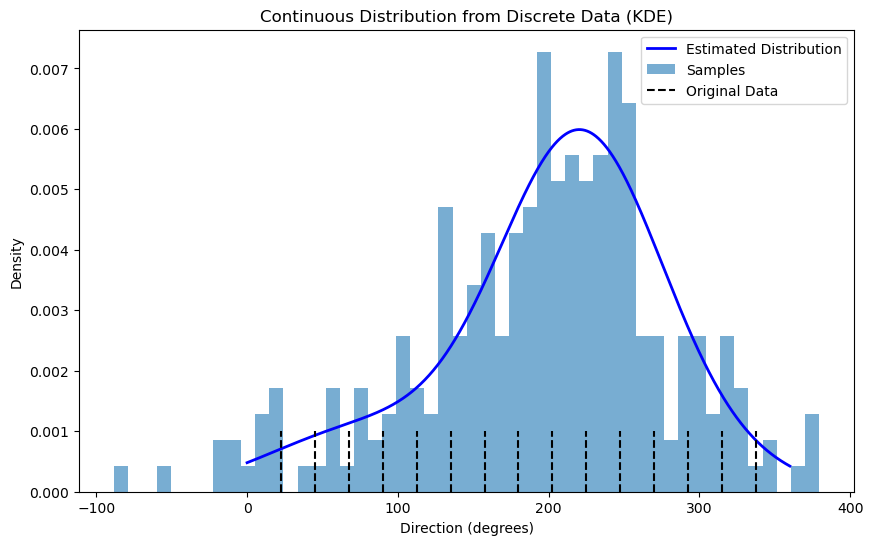

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

directions = FARDirectionNumericDist["Direction"].values
frequencies = FARDirectionNumericDist["Frequency"].values

kde = gaussian_kde(dataset=directions, weights=frequencies)

x_eval = np.linspace(0, 360, num=1000)
pdf = kde.evaluate(x_eval)

# Set sample count to whatever necessary. Keep in mind, more samples takes more memory
num_samples = 250

samples = kde.resample(num_samples).squeeze()

plt.figure(figsize=(10, 6))

plt.plot(x_eval, pdf, color='blue', lw=2, label='Estimated Distribution')

plt.hist(samples, bins=50, density=True, alpha=0.6, label='Samples')

plt.vlines(directions, 0, np.full_like(directions, 0.001), colors='k', linestyles='--', label='Original Data')

plt.xlabel('Direction (degrees)')
plt.ylabel('Density')
plt.title('Continuous Distribution from Discrete Data (KDE)')
plt.legend()
plt.show()

In [38]:
# Take random sample
print("Random Direction:", np.random.choice(samples))

Random Direction: 292.0728087625006
